<a href="https://colab.research.google.com/github/Saravananshankar98/Colab-ML/blob/main/Chronic_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_data = pd.read_csv('kidney_disease.csv')
df_data.shape

(400, 26)

In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
# id column delete pannanum
df_data.drop('id', axis=1, inplace=True)
df_data.head(3)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd


In [5]:
# feature count, mean, std, min, max all
df_data.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [6]:
# userfriendly column name changed
df_data.columns=['age', 'blood_pressure', 'specific_gravity','albumin','sugar','red_blood_cells', 'pus_cell','pus_cell_clumps', 'bacteria',
                 'blood_glucose_random', 'blood_urea', 'serum_creatinine','sodium','potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count',
                 'red_blood_cell_count', 'hypertension', 'diabetes_mellitus','coronary_artery_disease', 'apptite', 'peda_edema', 'anemia', 'class' ]
df_data.head(3)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,apptite,peda_edema,anemia,class
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd


In [7]:
# some column data type mismatch so fix this column correct datatype
text_columns =['packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']
for column in text_columns:
    print(f"{column} column datatype : {df_data[column].dtype}")

packed_cell_volume column datatype : object
white_blood_cell_count column datatype : object
red_blood_cell_count column datatype : object


In [8]:
def convert_text_to_numeric(df, columns):
    df[column] = pd.to_numeric(df[column], errors='coerce')

for column in text_columns:
    convert_text_to_numeric(df_data, column)
    print(f"{column} column datatype : {df_data[column].dtype}")

packed_cell_volume column datatype : float64
white_blood_cell_count column datatype : float64
red_blood_cell_count column datatype : float64


In [9]:
# missing value 0 above iruntha sort pannu
missing_values = df_data.isnull().sum()
missing_values[missing_values>0].sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
apptite                      1
peda_edema                   1
anemia                       1
dtype: int64

In [10]:
# mean numberic columns only
def mean_value_imputation(df, column):
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)
# Mode- catagory columns only
def mode_value_imputation(df, column):
    mode_value = df[column].mode()[0]
    df[column] = df[column].fillna(mode_value)

In [11]:
num_cols = [col for col in df_data.columns if df_data[col].dtype != 'object']

for column in num_cols:
    mean_value_imputation(df_data, column)

cat_cols = [col for col in df_data.columns if df_data[col].dtype == 'object']
for column in cat_cols:
    mode_value_imputation(df_data, column)

In [12]:
missing_values = df_data.isnull().sum()
missing_values[missing_values>0].sort_values(ascending=False)

Series([], dtype: int64)

In [13]:
# how to find unique catagory value
print(f"unique values in class column : {df_data['class'].unique()}")
print(f"unique values in red_blood_cells column : {df_data['red_blood_cells'].unique()}")
print(f"unique values in pus_cell column : {df_data['pus_cell'].unique()}")
print(f"unique values in pus_cell_clumps column : {df_data['pus_cell_clumps'].unique()}")
print(f"unique values in bacteria column : {df_data['bacteria'].unique()}")
print(f"unique values in hypertension column : {df_data['hypertension'].unique()}")
print(f"unique values in diabetes_mellitus column : {df_data['diabetes_mellitus'].unique()}")
print(f"unique values in coronary_artery_disease column : {df_data['coronary_artery_disease'].unique()}")
print(f"unique values in anemia column : {df_data['anemia'].unique()}")
print(f"unique values in apptite column : {df_data['apptite'].unique()}")
print(f"unique values in peda_edema column : {df_data['peda_edema'].unique()}")

unique values in class column : ['ckd' 'ckd\t' 'notckd']
unique values in red_blood_cells column : ['normal' 'abnormal']
unique values in pus_cell column : ['normal' 'abnormal']
unique values in pus_cell_clumps column : ['notpresent' 'present']
unique values in bacteria column : ['notpresent' 'present']
unique values in hypertension column : ['yes' 'no']
unique values in diabetes_mellitus column : ['yes' 'no' ' yes' '\tno' '\tyes']
unique values in coronary_artery_disease column : ['no' 'yes' '\tno']
unique values in anemia column : ['no' 'yes']
unique values in apptite column : ['good' 'poor']
unique values in peda_edema column : ['no' 'yes']


In [14]:
df_data['class'] = df_data['class'].replace(to_replace={'ckd\t':'ckd', 'notckd': 'not ckd'})
df_data['diabetes_mellitus'] = df_data['diabetes_mellitus'].replace(to_replace={' yes':'yes', '\tno': 'no', '\tyes': 'yes'})
df_data['coronary_artery_disease'] = df_data['coronary_artery_disease'].replace(to_replace={'\tno': 'no'})

In [15]:
# updated unique values
print(f"unique values in class column : {df_data['class'].unique()}")
print(f"unique values in diabetes_mellitus column : {df_data['diabetes_mellitus'].unique()}")
print(f"unique values in coronary_artery_disease column : {df_data['coronary_artery_disease'].unique()}")

unique values in class column : ['ckd' 'not ckd']
unique values in diabetes_mellitus column : ['yes' 'no']
unique values in coronary_artery_disease column : ['no' 'yes']


In [16]:
# category columns change numberic
df_data['class'] = df_data['class'].map({'ckd':1, 'not ckd':0})
df_data['red_blood_cells'] = df_data['red_blood_cells'].map({'normal':1, 'abnormal':0})
df_data['pus_cell'] = df_data['pus_cell'].map({'normal':1, 'abnormal':0})
df_data['pus_cell_clumps'] = df_data['pus_cell_clumps'].map({'present':1, 'notpresent':0})
df_data['bacteria'] = df_data['bacteria'].map({'present':1, 'notpresent':0})
df_data['hypertension'] = df_data['hypertension'].map({'yes':1, 'no':0})
df_data['diabetes_mellitus'] = df_data['diabetes_mellitus'].map({'yes':1, 'no':0})
df_data['coronary_artery_disease'] = df_data['coronary_artery_disease'].map({'yes':1, 'no':0})
df_data['apptite'] = df_data['apptite'].map({'good':1, 'poor':0})
df_data['peda_edema'] = df_data['peda_edema'].map({'yes':1, 'no':0})
df_data['anemia'] = df_data['anemia'].map({'yes':1, 'no':0})

In [17]:
df_data.head(3)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,apptite,peda_edema,anemia,class
0,48.0,80.0,1.02,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,7.0,50.0,1.02,4.0,0.0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,1,0,0,1
2,62.0,80.0,1.01,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,1,0,0,0,1,1


In [18]:
#check correlation
import matplotlib.pyplot as plt
import seaborn as sns

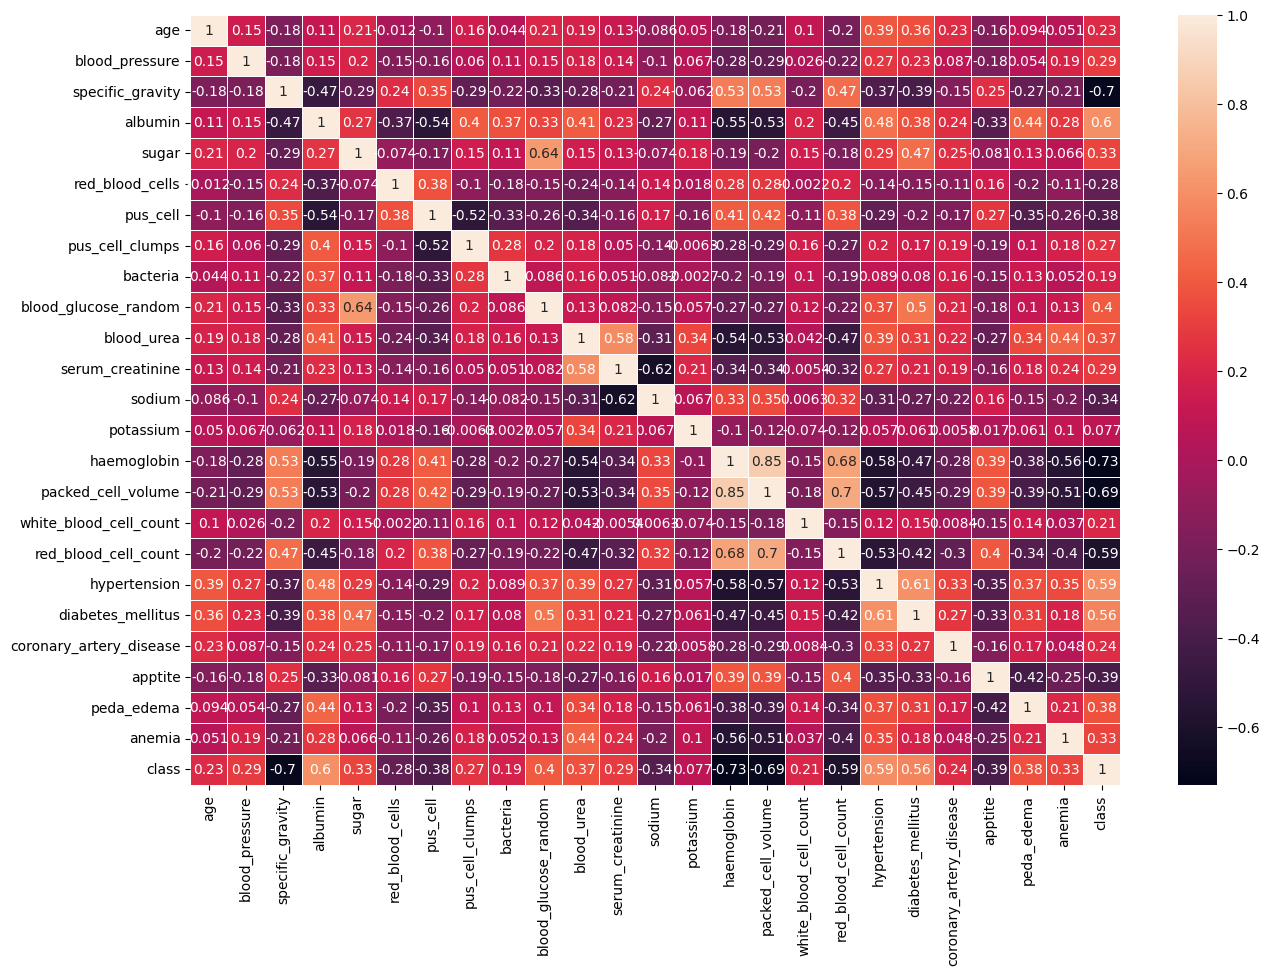

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(df_data.corr(), annot=True, linewidths= 0.5)
plt.show()

In [20]:
target_corr = df_data.corr()['class'].abs().sort_values(ascending=False)[1:]
target_corr

haemoglobin                0.729628
specific_gravity           0.698957
packed_cell_volume         0.690060
albumin                    0.599238
red_blood_cell_count       0.590913
hypertension               0.590438
diabetes_mellitus          0.559060
blood_glucose_random       0.401374
apptite                    0.393341
pus_cell                   0.375154
peda_edema                 0.375154
blood_urea                 0.372033
sodium                     0.342288
sugar                      0.327812
anemia                     0.325396
serum_creatinine           0.294079
blood_pressure             0.290600
red_blood_cells            0.282642
pus_cell_clumps            0.265313
coronary_artery_disease    0.236088
age                        0.225405
white_blood_cell_count     0.205274
bacteria                   0.186871
potassium                  0.076921
Name: class, dtype: float64

In [21]:
df_data['class'].value_counts()

class
1    250
0    150
Name: count, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x = df_data.drop('class', axis=1)
y = df_data['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=25)

print(f"x_train shape : {x_train.shape}")
print(f"x_test shape : {x_test.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"y_test shape : {y_test.shape}")

x_train shape : (300, 24)
x_test shape : (100, 24)
y_train shape : (300,)
y_test shape : (100,)


In [24]:
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier()
dct.fit(x_train, y_train)


DecisionTreeClassifier()

In [25]:
y_predict_dct = dct.predict(x_test)
y_predict_dct

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1])

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [27]:
models= []
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('RandomForestClassifier', RandomForestClassifier()))

In [28]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, precision_score

In [29]:
for name, model in models:
    print(name, model)
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    print(confusion_matrix(y_test, y_predict))
    print('\n')
    print(f"accuracy_score : {accuracy_score(y_test, y_predict)}")
    print(f"precision_score : {precision_score(y_test, y_predict)}")
    print(f"recall_score : {recall_score(y_test, y_predict)}")
    print(f"f1_score : {f1_score(y_test, y_predict)}")
    print('\n')


DecisionTreeClassifier DecisionTreeClassifier()
[[35  2]
 [ 2 61]]


accuracy_score : 0.96
precision_score : 0.9682539682539683
recall_score : 0.9682539682539683
f1_score : 0.9682539682539683


GaussianNB GaussianNB()
[[37  0]
 [ 5 58]]


accuracy_score : 0.95
precision_score : 1.0
recall_score : 0.9206349206349206
f1_score : 0.9586776859504132


KNeighborsClassifier KNeighborsClassifier()
[[27 10]
 [16 47]]


accuracy_score : 0.74
precision_score : 0.8245614035087719
recall_score : 0.746031746031746
f1_score : 0.7833333333333334


SVC SVC()
[[ 0 37]
 [ 0 63]]


accuracy_score : 0.63
precision_score : 0.63
recall_score : 1.0
f1_score : 0.7730061349693252


RandomForestClassifier RandomForestClassifier()
[[35  2]
 [ 0 63]]


accuracy_score : 0.98
precision_score : 0.9692307692307692
recall_score : 1.0
f1_score : 0.9843749999999999


